In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
covid_data = pd.read_csv("/content/covid_19_india.csv")
covid_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14510 entries, 0 to 14509
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       14510 non-null  int64         
 1   Date                      14510 non-null  datetime64[ns]
 2   Time                      14510 non-null  object        
 3   State/UnionTerritory      14510 non-null  object        
 4   ConfirmedIndianNational   14510 non-null  object        
 5   ConfirmedForeignNational  14510 non-null  object        
 6   Cured                     14510 non-null  int64         
 7   Deaths                    14510 non-null  int64         
 8   Confirmed                 14510 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1020.4+ KB


In [7]:
covid_data["Date"] = pd.to_datetime(covid_data["Date"])
covid_data.loc[:,"Date"]

0       2020-01-30
1       2020-01-31
2       2020-02-01
3       2020-02-02
4       2020-02-03
           ...    
14505   2021-05-03
14506   2021-05-03
14507   2021-05-03
14508   2021-05-03
14509   2021-05-03
Name: Date, Length: 14510, dtype: datetime64[ns]

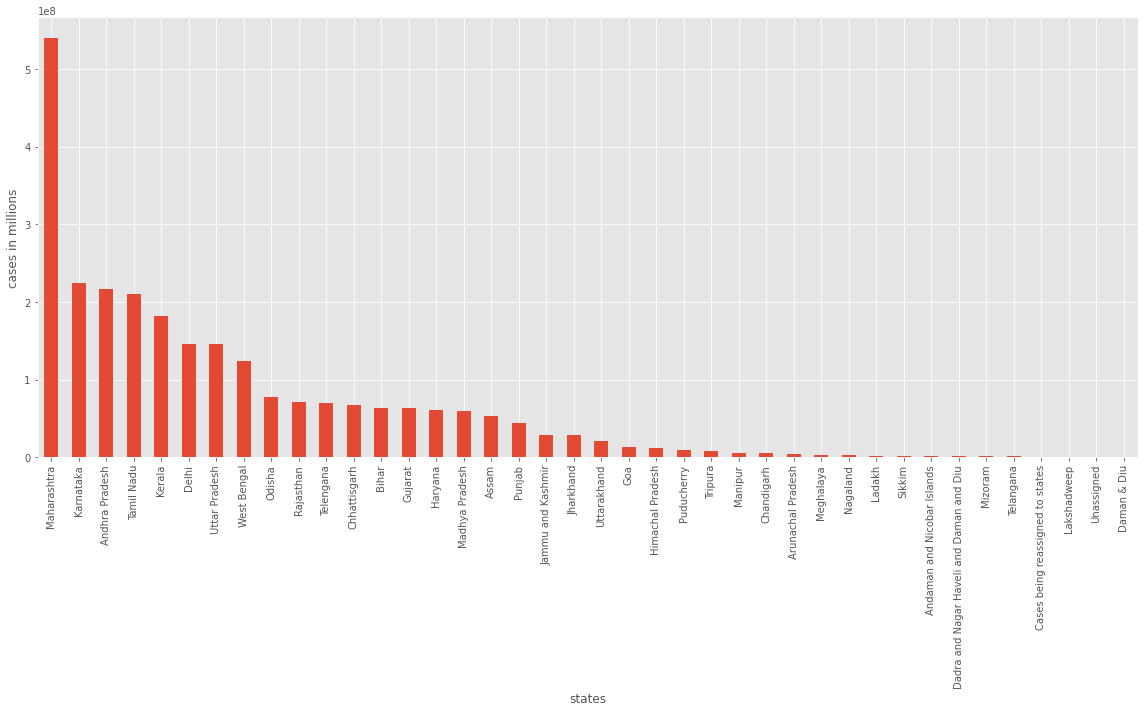

In [ ]:
plt.figure(figsize=(16,10))
plt.style.use("ggplot")
ax = covid_data.groupby(["State/UnionTerritory"])["Confirmed"].sum().sort_values(ascending=False).plot(kind="bar",linewidth=5)
plt.xlabel("states")
plt.ylabel("cases in millions")
plt.tight_layout()


In [8]:
maharashtra_covid_data = covid_data.loc[(covid_data["State/UnionTerritory"]=="Maharashtra"),["Date","Confirmed"]]
maharashtra_covid_data.index = maharashtra_covid_data["Date"]
maharashtra_covid_data.drop("Date",axis=1,inplace=True)
maharashtra_covid_data

,Confirmed
Date,
2020-03-09,2
2020-03-10,5
2020-03-11,2
2020-03-12,11
2020-03-13,14
...,...
2021-04-29,4473394
2021-04-30,4539553
2021-05-01,4602472


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


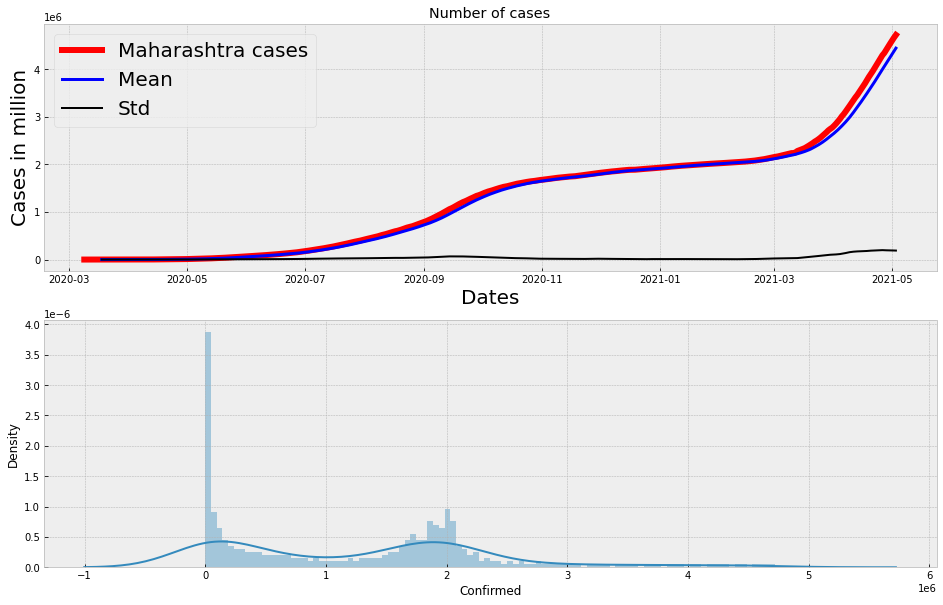

In [9]:
roll_mean = maharashtra_covid_data["Confirmed"].rolling(10).mean()
roll_std = maharashtra_covid_data["Confirmed"].rolling(10).std()



plt.figure(figsize=(16,10))
plt.style.use("bmh")

plt.subplot(2,1,1)
plt.plot(maharashtra_covid_data,color="red",linewidth=6,label="Maharashtra cases")
plt.plot(roll_mean,color="blue",linewidth=3,label="Mean")
plt.plot(roll_std,color="black",label="Std")
plt.legend(loc="upper left",fontsize=20)
plt.xlabel("Dates",fontdict={"fontsize":20})
plt.ylabel("Cases in million",fontdict={"fontsize":20})
plt.title("Number of cases")




plt.subplot(2,1,2)
sns.distplot(maharashtra_covid_data["Confirmed"],bins=100)
plt.show()


In [10]:
from statsmodels.tsa.api import adfuller
results = adfuller(maharashtra_covid_data["Confirmed"],autolag="AIC")
print("T-statistics :",results[0])
print("P-value :",results[1])
print("Lags used :",results[2])
print("No. of observation :",results[3])

for key,value in results[4].items():
  print(key,":",value)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


T-statistics : 1.4726080685620548
P-value : 0.9974202693368192
Lags used : 18
No. of observation : 402
1% : -3.446722009322339
5% : -2.868756617175256
10% : -2.570614247667137


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


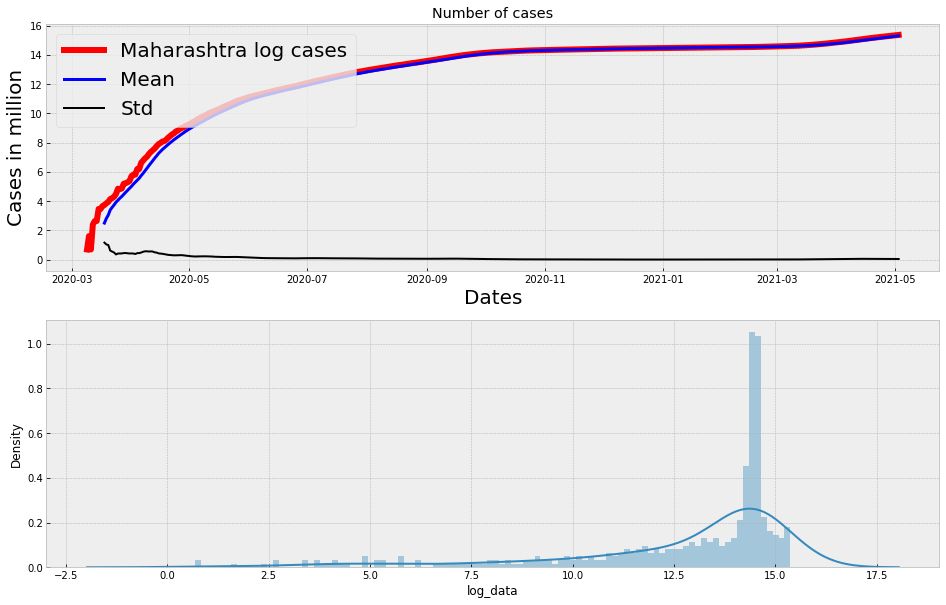

T-statistics : -4.2571693726468975
P-value : 0.0005265087563762487
Lags used : 15
No. of observation : 405
1% : -3.446599953548936
5% : -2.86870295908671
10% : -2.570585643956714


In [11]:
maharashtra_covid_data["log_data"] = np.log(maharashtra_covid_data["Confirmed"])

roll_mean_log = maharashtra_covid_data["log_data"].rolling(10).mean()
roll_std_log = maharashtra_covid_data["log_data"].rolling(10).std()



plt.figure(figsize=(16,10))
plt.style.use("bmh")

plt.subplot(2,1,1)
plt.plot(maharashtra_covid_data["log_data"],color="red",linewidth=6,label="Maharashtra log cases")
plt.plot(roll_mean_log,color="blue",linewidth=3,label="Mean")
plt.plot(roll_std_log,color="black",label="Std")
plt.legend(loc="upper left",fontsize=20)
plt.xlabel("Dates",fontdict={"fontsize":20})
plt.ylabel("Cases in million",fontdict={"fontsize":20})
plt.title("Number of cases")




plt.subplot(2,1,2)
sns.distplot(maharashtra_covid_data["log_data"],bins=100)
plt.show()





from statsmodels.tsa.api import adfuller
results = adfuller(maharashtra_covid_data["log_data"],autolag="AIC")
print("T-statistics :",results[0])
print("P-value :",results[1])
print("Lags used :",results[2])
print("No. of observation :",results[3])

for key,value in results[4].items():
  print(key,":",value)

In [12]:
maharashtra_covid_data

,Confirmed,log_data
Date,,
2020-03-09,2,0.693147
2020-03-10,5,1.609438
2020-03-11,2,0.693147
2020-03-12,11,2.397895
2020-03-13,14,2.639057
...,...,...
2021-04-29,4473394,15.313658
2021-04-30,4539553,15.328339
2021-05-01,4602472,15.342104


In [13]:
log_shift_data = maharashtra_covid_data["log_data"] - maharashtra_covid_data["log_data"].shift(2)
log_shift_data.dropna(axis=0,inplace=True)
log_shift_data

Date
2020-03-11    0.000000
2020-03-12    0.788457
2020-03-13    1.945910
2020-03-14    0.241162
2020-03-15    0.826679
                ...   
2021-04-29    0.029415
2021-04-30    0.028935
2021-05-01    0.028446
2021-05-02    0.027421
2021-05-03    0.025724
Name: log_data, Length: 419, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


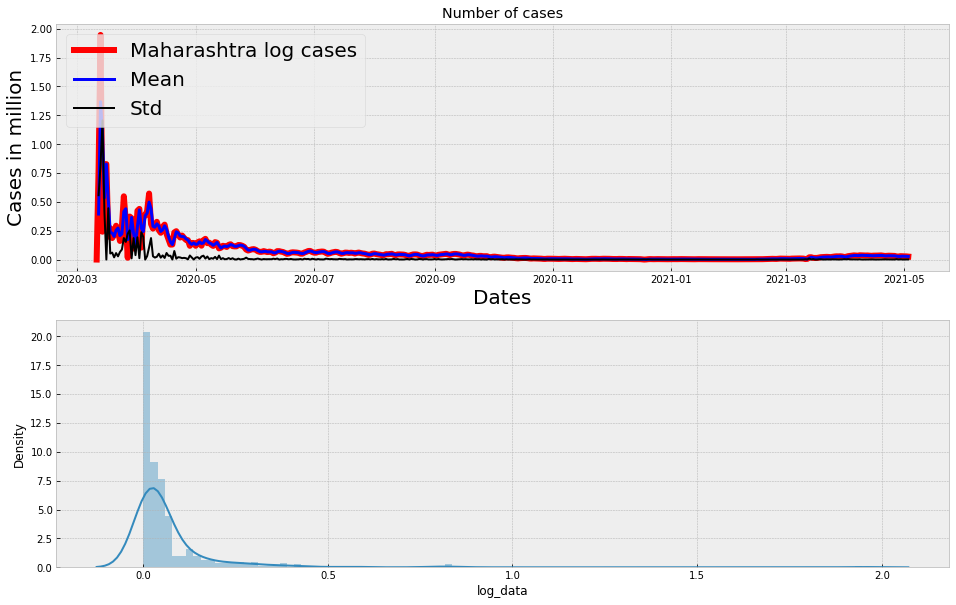

T-statistics : -5.265244157798717
P-value : 6.460278483319013e-06
Lags used : 18
No. of observation : 400
1% : -3.4468044036406247
5% : -2.868792838125
10% : -2.57063355625


In [14]:
roll_mean_log_2 = log_shift_data.rolling(2).mean()
roll_std_log_2 = log_shift_data.rolling(2).std()



plt.figure(figsize=(16,10))
plt.style.use("bmh")

plt.subplot(2,1,1)
plt.plot(log_shift_data,color="red",linewidth=6,label="Maharashtra log cases")
plt.plot(roll_mean_log_2,color="blue",linewidth=3,label="Mean")
plt.plot(roll_std_log_2,color="black",label="Std")
plt.legend(loc="upper left",fontsize=20)
plt.xlabel("Dates",fontdict={"fontsize":20})
plt.ylabel("Cases in million",fontdict={"fontsize":20})
plt.title("Number of cases")




plt.subplot(2,1,2)
sns.distplot(log_shift_data,bins=100)
plt.show()





from statsmodels.tsa.api import adfuller
results = adfuller(log_shift_data,autolag="AIC")
print("T-statistics :",results[0])
print("P-value :",results[1])
print("Lags used :",results[2])
print("No. of observation :",results[3])

for key,value in results[4].items():
  print(key,":",value)

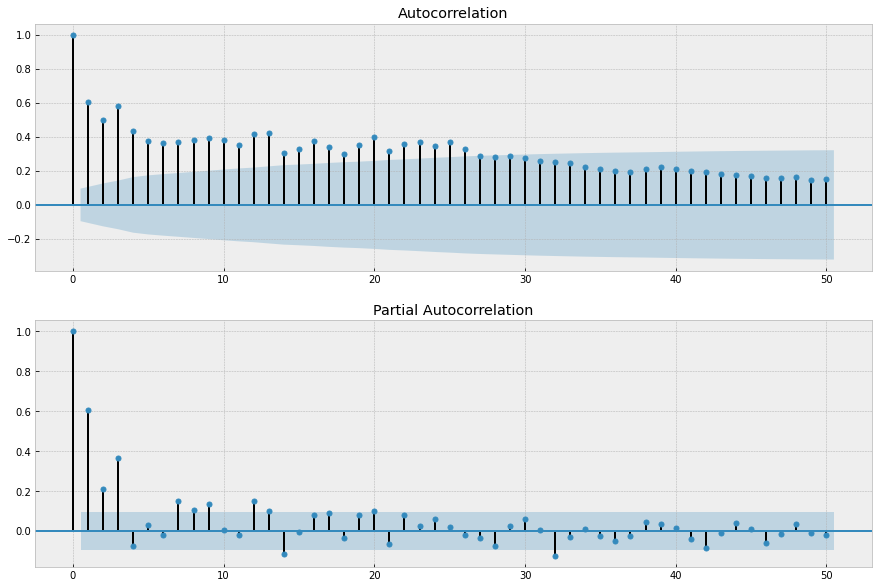

In [15]:
'''
As the statistical analysis shows that th p value is less than 5% which denotes the null hypothesis is rejected and alternate hypothesis is accepted
also the 5% value is greater than t statistics score

null hypothesis ---> Time series is not Stationary
alternate hypothesis ---> Time series is stationary
'''
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(15,10))

plot_acf(log_shift_data,lags=50,ax=ax[0])
plot_pacf(log_shift_data,lags=50,ax=ax[1])
plt.show()




/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


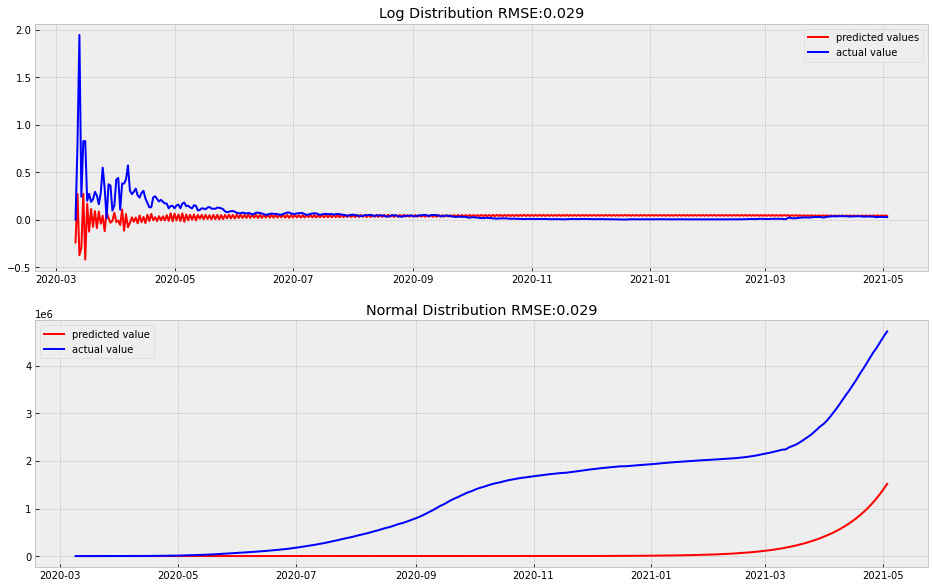

In [20]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


#the model can be trained and validated from the following data
# train = maharashtra_covid_data["log_data"][:350] #training data 
# test = maharashtra_covid_data["log_data"][350:]  #testing data


model = ARIMA(maharashtra_covid_data["log_data"],order=(2,1,1))
results_ = model.fit(disp=-1)

plt.figure(figsize=(16,10))
plt.style.use("bmh")

plt.subplot(2,1,1)
plt.title("Log Distribution RMSE:%.3f"%mean_squared_error(results_.fittedvalues[1:],log_shift_data,squared=True))
plt.plot(results_.fittedvalues[1:],color="red",label="predicted values")
plt.plot(log_shift_data,color="blue",label="actual value")
plt.legend(loc="best")




plt.subplot(2,1,2)
plt.title("Normal Distribution RMSE:%.3f"%mean_squared_error(results_.fittedvalues[1:],log_shift_data,squared=True))
plt.plot(np.exp(results_.fittedvalues.cumsum()),label="predicted value",color="red")
plt.plot(maharashtra_covid_data["Confirmed"],color="blue",label="actual value")
plt.legend(loc="best")
plt.show()



In [90]:
results_.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.log_data   No. Observations:                  349
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 377.263
Method:                       css-mle   S.D. of innovations              0.081
Date:                Sat, 08 May 2021   AIC                           -740.526
Time:                        09:28:33   BIC                           -713.541
Sample:                    03-10-2020   HQIC                          -729.784
                         - 02-21-2021                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0644      0.041      1.576      0.116      -0.016       0.145
ar.L1.D.log_data    -1.3151      0.034    -39.018      0.000      -1.381      -1.249
ar.L2.D.log_data    -0.0510      0.044     -1.173      0.242      -0.136       0.034
ar.L3.D.log_data     1.2357      0.048     25.838      0.000       1.142       1.329
ar.L4.D.log_data     0.9231      0.028     33.166      0.000       0.869       0.978
ma.L1.D.log_data     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0329           -0.0000j            1.0329           -0.0000
AR.2           -0.6667           -0.7521j            1.0050           -0.3654
AR.3           -0.6667           +0.7521j            1.0050            0.3654
AR.4           -1.0382           -0.0000j            1.0382           -0.5000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

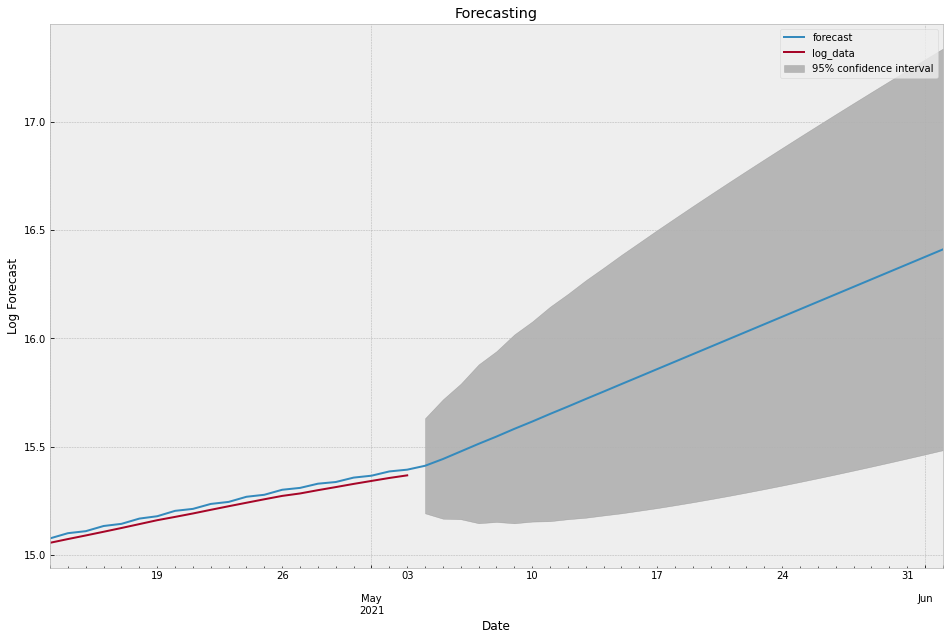

In [23]:
with mpl.rc_context():
  mpl.rc("figure",figsize=(16,10))
  plt.style.use("bmh")
  results_.plot_predict(start=400,end=450,alpha=0.05)
  mpl.rc('lines',lw=2)
  plt.title("Forecasting")
  plt.xlabel("Date")
  plt.ylabel("Log Forecast")

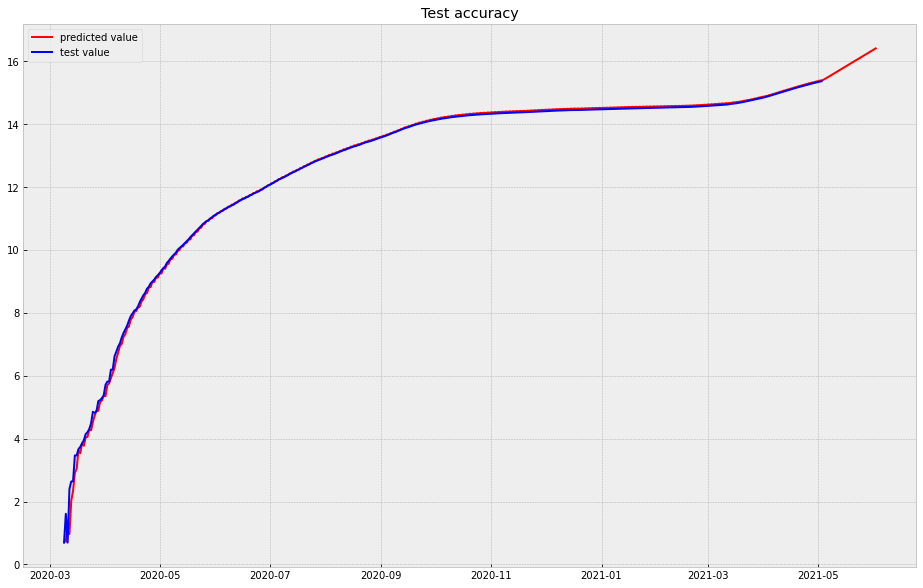

In [27]:
'''
with 95% of confidence interval as per time series model the covid cases in maharashtra will peak at exponenetial of 15.5 i.e greater than 5 million
around 10th of may 2021
'''

predictions = results_.predict(1,450,typ="levels")

plt.figure(figsize=(16,10))
plt.plot(predictions,color="red",label="predicted value")
plt.plot(maharashtra_covid_data["log_data"],color="blue",label="test value")
plt.legend(loc="best")
plt.title("Test accuracy")
plt.show()

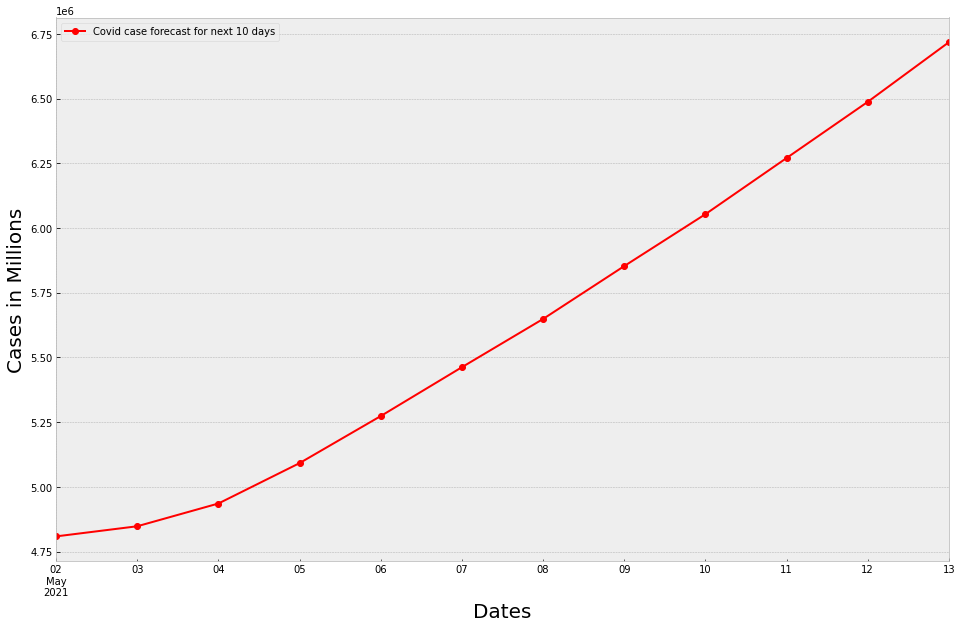

In [32]:
#predicting forecast for next 10 days

a = pd.Series(results_.predict(start=419,end=430,typ="levels"))
plt.figure(figsize=(16,10))
a = np.exp(a)
a.plot(kind="line",color="red",marker="o",label="Covid case forecast for next 10 days")
plt.legend(loc="upper left")
plt.xlabel("Dates",fontdict={"fontsize":20})
plt.ylabel("Cases in Millions",fontdict={"fontsize":20})
plt.show()

In [31]:
'''
Calculating Root mean square error of the model
'''
from sklearn.metrics import mean_squared_error
error = mean_squared_error(maharashtra_covid_data["log_data"][1:],results_.fittedvalues.cumsum(),squared=True)

print("error %s"%error)
'''
model is exhibiting high training error and high test error which means a complex tranformation is needed
to transform a non stationary time series and the number of lags may differ.
To get the exact value of lags an autoarima model is used
'''

error 60.61728315199619


'\nmodel is exhibiting high training error and high test error which means a complex tranformation is needed\nto transform a non stationary time series and the number of lags may differ.\nTo get the exact value of lags an autoarima model is used\n'

In [37]:
np.exp(15.54695017)

5648780.109569294